# Pair Programming Intro Regresión Lineal - Intro


In [14]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding

# Para evitar que salgan los warnings en jupyter
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [2]:
df = pd.read_csv('datos/pokePdcodificado.csv', index_col = 0)
df.head()

,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed_BOX,Type_Bug,Type_Dark,...,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
0,Grass,-0.819945,-0.75000,-0.738095,-0.500000,-0.088889,-0.131579,16.160251,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Poison,-0.819945,-0.75000,-0.738095,-0.500000,-0.088889,-0.131579,16.160251,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Grass,-0.337950,-0.28125,-0.428571,-0.166667,0.244444,0.263158,19.724770,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Poison,-0.337950,-0.28125,-0.428571,-0.166667,0.244444,0.263158,19.724770,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Grass,0.326870,0.34375,0.047619,0.309524,0.688889,0.789474,24.005888,0,0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
#Dividimos los datos del df en X (variables predictoras) e y(Vrespuesta)

X = df.drop(['Type', 'Speed_BOX'], axis = 1)

y = df['Speed_BOX']

In [5]:
X.head()

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Type_Bug,Type_Dark,Type_Dragon,Type_Electric,...,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
0,-0.819945,-0.75000,-0.738095,-0.500000,-0.088889,-0.131579,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.819945,-0.75000,-0.738095,-0.500000,-0.088889,-0.131579,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.337950,-0.28125,-0.428571,-0.166667,0.244444,0.263158,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.337950,-0.28125,-0.428571,-0.166667,0.244444,0.263158,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.326870,0.34375,0.047619,0.309524,0.688889,0.789474,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
y.head(2)

0    16.160251
1    16.160251
Name: Speed_BOX, dtype: float64

In [8]:
# Dividimos los datos de entrenamiento y de test. El tamaño de la muestra del test puede ir de 0.2 a 0.3

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos que usaremos de nuestro ordenador. 
# Al indicar -1 significa que los usaremos todos. 

lr = LinearRegression(n_jobs=-1)

In [10]:
# Hacemos fit al modelo: significa que le pasamos los datos para que aprenda el algoritmo

lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [11]:
# A continuación, usamos el método predict() de sklearn para obtener nuestras predicciones

y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test) 

In [18]:
#Sacamos los dataframes de los modelos de entrenamiento y test y, seguidamente, los unimos con un concat()

train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})

resultados = pd.concat([train_df,test_df], axis = 0)
resultados.sample (2)

,Real,Predicted,Set
1059,9.009157,10.519727,Train
829,19.724770,19.126006,Train


In [20]:
#Obtenemos los residuos, que es la diferencia entre los valores observados reales y los que predice el modelo.
#En nuestro caso son positivos, lo que quiere decir que el valor observado de y es mayor que es valor estimado. 
#Por lo tanto, la variable y se infraestima

resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.sample(5)

,Real,Predicted,Set,residuos
1345,7.238281,9.451977,Train,-2.213697
1061,18.576988,18.135622,Test,0.441366
1493,14.879097,14.896979,Test,-0.017882
22,21.921080,21.234426,Train,0.686654
832,14.879097,14.654420,Train,0.224677


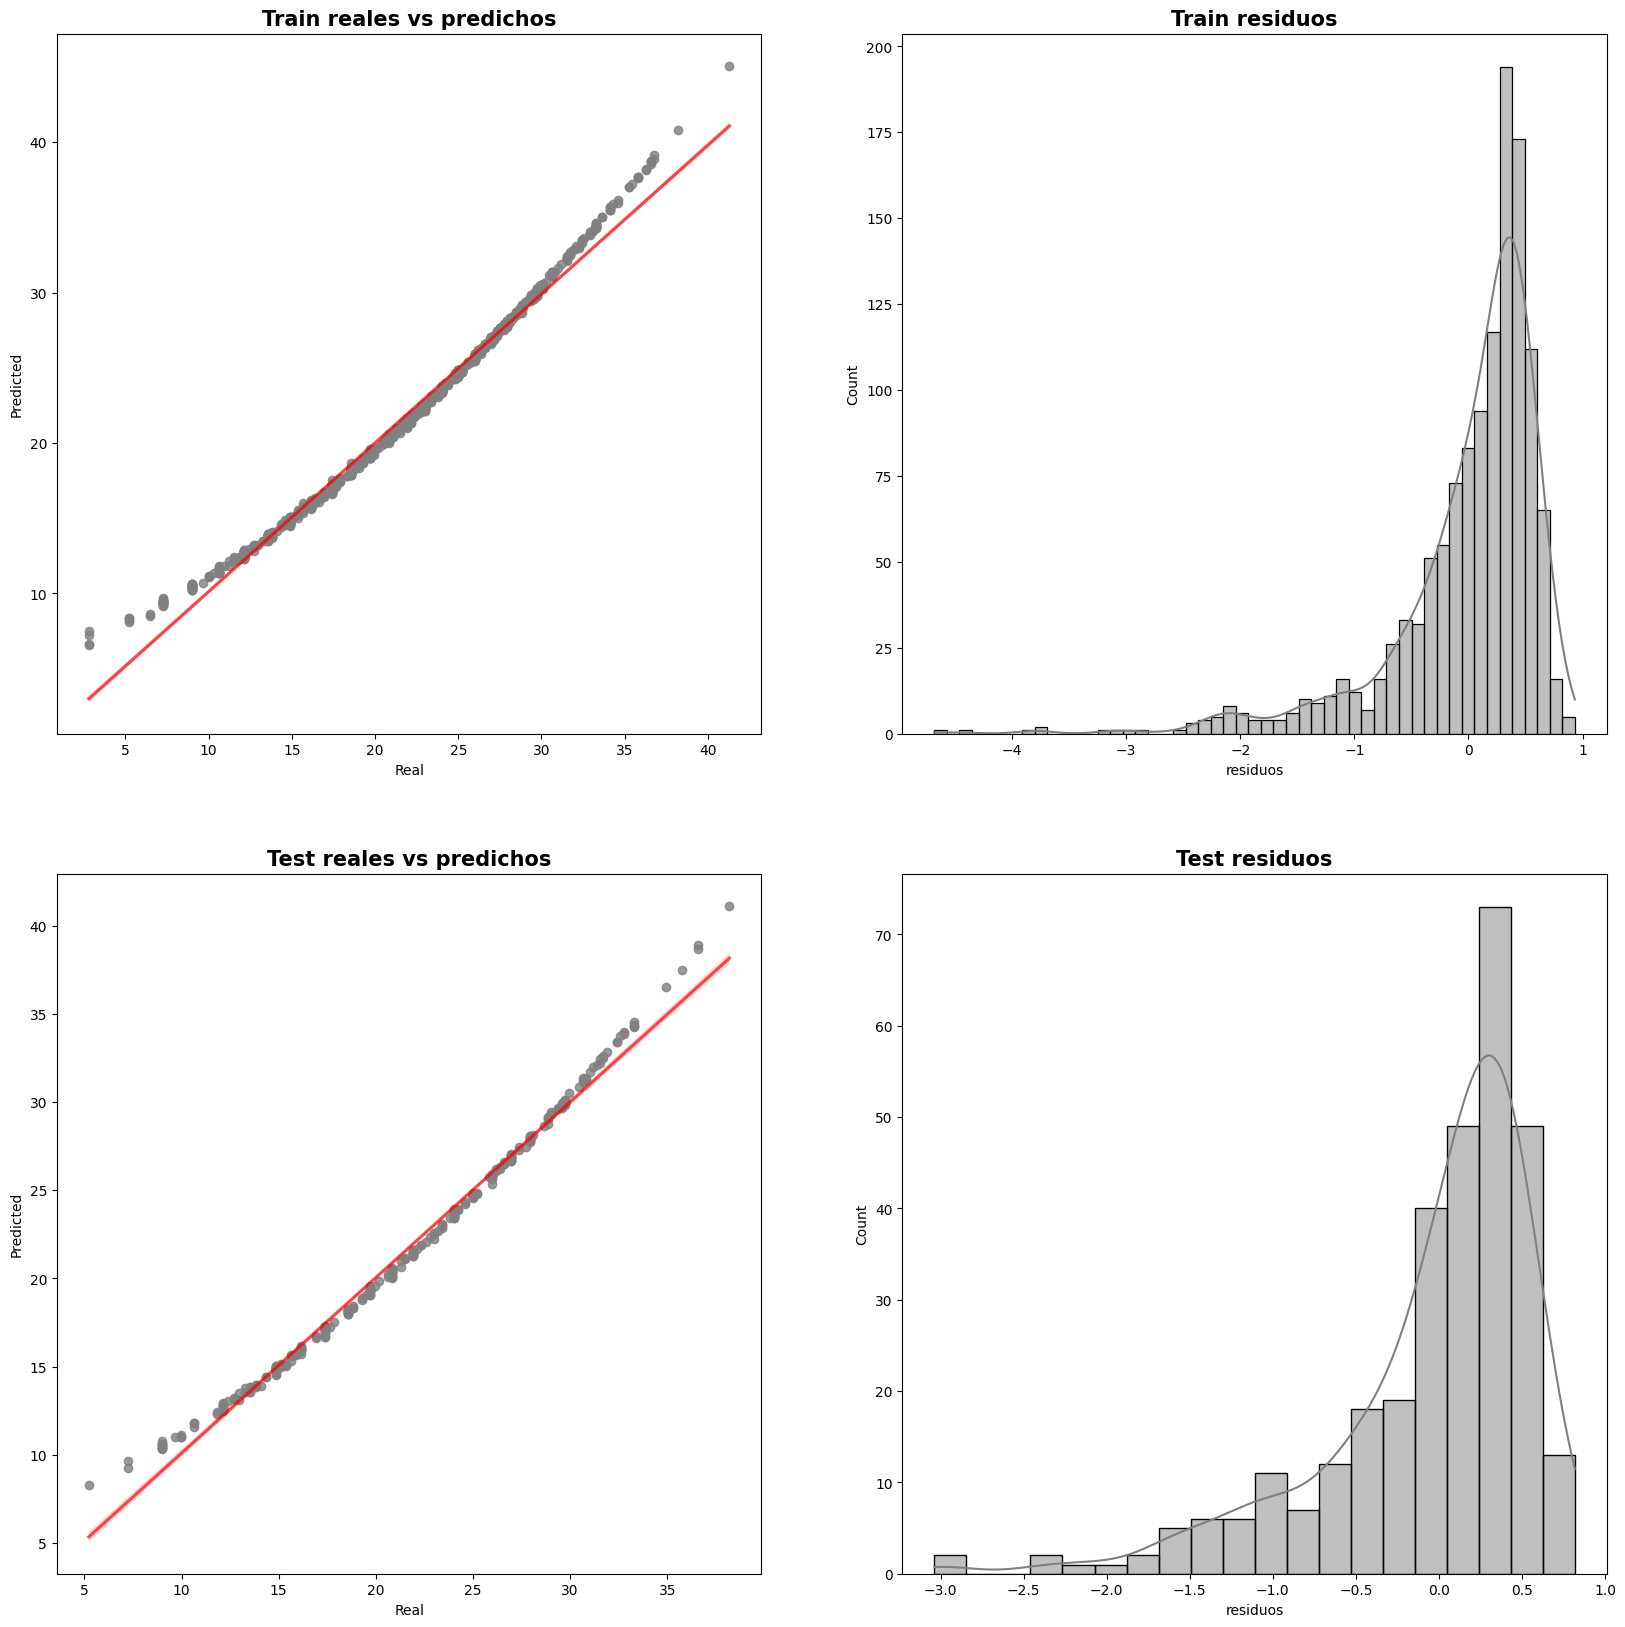

In [15]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [21]:
#A continuación, realizamos la validación cruzada también con dos métricas 

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

In [23]:
#Convertimos el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores.head()

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.053353,0.016633,0.990906,-0.622469
1,0.055711,0.007709,0.990655,-0.626984
2,0.041778,0.010982,0.984069,-0.816277
3,0.054727,0.008557,0.985122,-0.740206
4,0.027023,0.007997,0.990433,-0.657675


In [24]:
# calculamos la media para cada una de las métricas

print(f'la media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

la media para el r2 es 0.99
la media para el RMSE es 0.68
